# Исследование поведения пользователей мобильной игры и анализ функциональностей


# Оглавление

- [Описание проекта](#project)
- [Импорт библиотек](#bibl)
- [Получение данных из базы данных](#sql)
- [Исследование и предобработка данных](#invastigate)
- [Анализ пользовательских событий](#analytics)
    - [1. Определение конверсии на каждом из этапов воронки](#1)
    - [2. Анализ уникальных пользовательских путей](#2)
        - [Вывод к разделу 2](#v2)
    - [3. Анализ временных промежутков](#3)
        - [3.1 Анализ врекменных промежутков по всем пользователям](#3.1) 
            - [Вывод к разделу 3.1](#v3.1)
        - [3.2 Анализ временных промежутков по сегментам](#3.2)
            - [Вывод к разделу 3.2](#v3.2)
    - [4. Анализ зависимости оплат](#4)
        - [4.1 Зависимость оплат от прохождения обучения](#4.1)
            - [Вывод к разделу 4.1](#v4.1)
        - [4.2 Зависимость оплат от количества пройденных обучений](#4.2)
            - [Вывод к разделу 4.2](#v4.2)
    - [5. Частота начала этапа обучения после выбора уровня сложности](#5)
        - [Вывод к разделу 5](#v5)
    - [6. Анализ выбора уровня сложности](#6)
        - [6.1 Вероятность оплаты в зависиморсти от уровня сложности](#6.1)
             - [Вывод к разделу 6.1](#v6.1)
        - [6.2 Разница во времени оплат в зависимости от уровня сложности](#6.2)
            - [Вывод к разделу 6.2](#v6.2)

    



<a id='project'></a>
# Описание проекта

В данном проекте проводится исследование поведения пользователей мобильной игры Quiz Freeze. Это сборник вопросов в различных форматах и темах, на которые игрокам нужно давать ответы. Игра одиночная, то есть каждый игрок отвечает на вопросы самостоятельно. 

Игра состоит из следующих этапов: 
- Регистрация;
- Старт обучения;
- Завершение обучения;
- Выбор уровня сложности вопросов; 
- Выбор пакетов вопросов;
- Покупка платных пакетов вопросов

Рассмотрим подробнее каждый этап: 
- Регистрация (registration) - это обязательный этап. Без регистрации пользователь не может пройти на следующие этапы работы с приложением. 
- Старт обучения (tutorial_start) — опциональный этап. Пользователь после регистрации может перейти к обучению работе с приложением, а может и не перейти. При этом вернуться к обучению можно в любой момент. А ещё можно пройти обучение несколько раз.
- Завершение обучения (tutorial_finish) может произойти только в случае, если ранее произошло событие «Старт обучения», но при этом пользователь может не завершить обучение.
- Выбор уровня сложности вопросов (level_choice) — это обязательное событие, которое нужно для того, чтобы перейти к выбору пакетов вопросов. Таким образом, пользователь может не пройти обучение или даже не начинать его, но прежде чем начать отвечать, он обязан выбрать уровень сложности.
- Выбор пакетов вопросов (training_choice) — это этап, на котором пользователь выбирает себе бесплатный набор пакетов вопросов, на которые он будет отвечать.
- Покупка платных пакетов вопросов — это факт совершения оплаты за вопросы, которые не доступны в списке бесплатных вопросов.



<b>Цель проекта</b>: 
Необходимо провести исследование поведения пользователей мобильной игры Quiz Freeze и проанализировать как текущая функциональность приложения влияет на конверсию, доход и время прохождения игры. 

<b>Данные</b>: 
Только пользователи, зарегистрированные в 2018 году. 


# Задачи: 

1. Определение конверсии на каждом из этапов воронки.


2. Определить самые распространённые пути прохождения этапов в приложении. Это позволит понять, как пользователи взаимодействуют с продуктом, соотнести идеальный путь пользователей (какой задумывали при разработке игры) с фактическим.


3. 1) Проанализировать время между различными этапами. Выделив этапы, которые занимают больше всего времени, мы сможем поработать над их улучшением.

3. 2) Понять отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение. Насколько обучение сокращает время прохождения этапов?


4. 1) Проанализировать зависимость оплат от прохождения обучения. Для этого нужно определить, существует ли различие в частоте и средней величине оплат между тремя группами пользователей:
    - пользователями, которые прошли обучение хотя бы раз;
    - пользователями, которые начали обучение, но не прошли его ни разу;
    - пользователями, которые не начинали обучение, а сразу же перешли к выбору уровня сложности.


4. 2) Посмотреть, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение само по себе влияет на оплату.

5. Как часто пользователи начинают обучение после того, как они выбрали уровень сложности? Это позволит нам понять, насколько прозрачен процесс взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.


6. 1 Зависит ли вероятность оплаты от выбранного пользователем уровня сложности?


6. 2 Существует ли разница во времени между пользователями с разным уровнем сложности и их первой оплатой?


 


<a id="bibl"></a>

In [1]:
# Импорт библиотек
import pandas as pd
import psycopg2
import psycopg2.extras 
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy 
import cufflinks as cf
import plotly.io as pio
pio.renderers.default='notebook' # для отображения графиков плотли в nbviewer

init_notebook_mode(connected = True) # для работы с плотли оффлайн
cf.go_offline()




pd.set_option("display.max_colwidth", -1) # для переноса текста в ячейках таблиц

%matplotlib inline

<ipython-input-1-a3620bfd16a2>:22: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



<a id='sql'></a>
# Получение данных из базы данных
В sql запросе указано, что мы берем пользователей, которые зарегистрировались в 2018 году

In [2]:
def getEventsData():
    query = '''SELECT e.* FROM case8.events e
    WHERE e.user_id in
    (SELECT DISTINCT(user_id) 
    FROM case8.events 
    WHERE event_type = 'registration' 
    AND start_time >= '2018-01-01'
    AND start_time < '2019-01-01')
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # доступ к БД удален в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

def getPurchaseData():
    query = '''SELECT p.* FROM case8.purchase p
    WHERE p.user_id in
    (SELECT DISTINCT(user_id) 
    FROM case8.events 
    WHERE event_type = 'registration' 
    AND start_time >= '2018-01-01'
    AND start_time < '2019-01-01')
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # доступ к БД удален в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

events_df = pd.DataFrame(getEventsData())
purchase_df = pd.DataFrame(getPurchaseData())


<a id='invastigate'></a>
# Исследование и предобработка данных

Посмотрим на таблицы с данными, которые выгрузили, а также проверим, типы данных и пропущенные значения. 

In [3]:
print('events')
display(events_df.head(10))
events_df.info()
print('______________________________________________________________________')
print()
print('purchase')
display(purchase_df.head(10))
purchase_df.info()





events


,event_type,selected_level,start_time,tutorial_id,user_id,id
0,registration,None,2018-01-01 04:51:58,NaN,47758,147264
1,registration,None,2018-01-01 08:32:05,NaN,47759,147268
2,registration,None,2018-01-01 09:30:10,NaN,47760,147269
3,registration,None,2018-01-01 09:39:27,NaN,47761,147270
4,registration,None,2018-01-01 11:41:27,NaN,47762,147271
5,registration,None,2018-01-01 12:23:51,NaN,47763,147272
6,tutorial_start,None,2018-01-01 13:55:11,49555.0,47758,147273
7,tutorial_start,None,2018-01-01 13:56:40,49556.0,47761,147274
8,tutorial_finish,None,2018-01-01 13:59:44,49556.0,47761,147275
9,registration,None,2018-01-01 14:15:39,NaN,47764,147276


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82779 entries, 0 to 82778
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_type      82779 non-null  object        
 1   selected_level  10198 non-null  object        
 2   start_time      82779 non-null  datetime64[ns]
 3   tutorial_id     41201 non-null  float64       
 4   user_id         82779 non-null  int64         
 5   id              82779 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.8+ MB
______________________________________________________________________

purchase


,user_id,start_time,amount,id
0,67986,2018-11-17 13:18:35,50,20103
1,58528,2018-06-23 23:24:43,100,19351
2,61351,2018-08-08 09:40:36,100,19565
3,48037,2018-01-10 13:08:34,50,18470
4,67987,2018-11-13 22:51:38,100,20087
5,51206,2018-02-28 19:48:16,100,18720
6,65863,2018-10-16 09:09:58,25,19928
7,61608,2018-08-07 11:59:59,50,19561
8,63035,2018-09-01 09:19:48,100,19662
9,57360,2018-05-28 19:05:38,50,19209


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     1974 non-null   int64         
 1   start_time  1974 non-null   datetime64[ns]
 2   amount      1974 non-null   int64         
 3   id          1974 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 61.8 KB


Оценим, какие уникальные события есть в колонках event_type и selected_level:

In [4]:
print('Типы события(event_type): ')
print(events_df['event_type'].unique())
print()
print(print('Уровни(selected_level): '))
print(events_df['selected_level'].unique())


Типы события(event_type): 
['registration' 'tutorial_start' 'tutorial_finish' 'level_choice'
 'training_choice']

Уровни(selected_level): 
None
[None 'hard' 'easy' 'medium']


Все типы данных приведены в таблицах events и purchase в нужном виде. Преобразование столбцов с датами в тип datetime не требуется, так как при выгрузке данных из БД этот столбец загрузился с правильным типом данных. 

В таблице events имеются пропущенные значения -  в столбцах selected_level и tutorial_id, так как в первом случае поле заполняется только при наступлении типа события level_choice, а во втором только в случае типа tutorial_start или tutorial_finish. 

Всего имеется 5 типов событий (пропущенных значений нет), а именно: 'registration', 'tutorial_start', 'tutorial_finish', 'level_choice', 'training_choice'. 

Всего имеется 3 уровня сложности (плюс пропущенные значений none): 'hard', 'easy', 'medium'. 
Уровень сложности можно выбрать только один раз. 

Переименуем столбцы перед объединением таблиц, а также добавим новый столбец в purchase_df для однозначного выделения события оплаты в новой объединенной таблице

In [5]:
purchase_df['event_type'] = 'purchase'
events_df = events_df.rename(columns={'id':'event_id'})
purchase_df = purchase_df.rename(columns={'id':'purchase_id'})




Создадим датафрейм из объединения событий и оплат

In [6]:
total_events_df = pd.concat([events_df, purchase_df], sort = False)
display(total_events_df.head(10))
total_events_df.info()



,event_type,selected_level,start_time,tutorial_id,user_id,event_id,amount,purchase_id
0,registration,None,2018-01-01 04:51:58,NaN,47758,147264.0,NaN,NaN
1,registration,None,2018-01-01 08:32:05,NaN,47759,147268.0,NaN,NaN
2,registration,None,2018-01-01 09:30:10,NaN,47760,147269.0,NaN,NaN
3,registration,None,2018-01-01 09:39:27,NaN,47761,147270.0,NaN,NaN
4,registration,None,2018-01-01 11:41:27,NaN,47762,147271.0,NaN,NaN
5,registration,None,2018-01-01 12:23:51,NaN,47763,147272.0,NaN,NaN
6,tutorial_start,None,2018-01-01 13:55:11,49555.0,47758,147273.0,NaN,NaN
7,tutorial_start,None,2018-01-01 13:56:40,49556.0,47761,147274.0,NaN,NaN
8,tutorial_finish,None,2018-01-01 13:59:44,49556.0,47761,147275.0,NaN,NaN
9,registration,None,2018-01-01 14:15:39,NaN,47764,147276.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84753 entries, 0 to 1973
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_type      84753 non-null  object        
 1   selected_level  10198 non-null  object        
 2   start_time      84753 non-null  datetime64[ns]
 3   tutorial_id     41201 non-null  float64       
 4   user_id         84753 non-null  int64         
 5   event_id        82779 non-null  float64       
 6   amount          1974 non-null   float64       
 7   purchase_id     1974 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 5.8+ MB


Проверим, где есть повторение этапов. Для этого посчитаем количество повторений каждого этапа у каждого пользователя и найдем среднее среди этих количеств. Если среднее равно 1, значит, дубликатов нет и этап можно пройти только 1 раз, не равно 1, значит, есть повторения и пользователь может пройти этап несколько раз. Эта информация понадобится в дальнейшем. 

In [7]:
print('Регистрация:', total_events_df[total_events_df['event_type']=='registration']['user_id'].value_counts().mean()) 
print('Начало обучения:', total_events_df[total_events_df['event_type']=='tutorial_start']['user_id'].value_counts().mean()) 
print('Конец обучения:', total_events_df[total_events_df['event_type']=='tutorial_finish']['user_id'].value_counts().mean()) 
print('Выбор уровня сложности:', total_events_df[total_events_df['event_type']=='level_choice']['user_id'].value_counts().mean()) 
print('Выбор бесплатного пакета вопросов:', total_events_df[total_events_df['event_type']=='training_choice']['user_id'].value_counts().mean()) 
print('Выбор платного пакета вопросов:', total_events_df[total_events_df['event_type']=='purchase']['user_id'].value_counts().mean()) 




Регистрация: 1.0
Начало обучения: 1.5529516871692668
Конец обучения: 1.484638097518155
Выбор уровня сложности: 1.0
Выбор бесплатного пакета вопросов: 1.0
Выбор платного пакета вопросов: 1.0


Итак мы видим, что повторяться могут только этап начала обучения и этап завершения обучения. Пользователь может решить уже после оплаты, что забыл, как пользоваться приложением, и снова пройти обучение. Или он может начать одно обучение, но не пройти его до конца сразу и забросить. В следующий заход в приложение ему придется начать обучение снова, если оно ему понадобится. То же самое и для этапа заверешения обучения. 

<a id='analytics'></a>
# Анализ пользовательских событий

<a id='1'></a>

## 1. Определение конверсии на каждом из этапов воронки
Для того чтобы понимать, как пользователи переходят из этапа в этап и на каких из них возникают сложности, мы должны определить конверсию на каждом из этапов воронки. То есть нам нужно понять, какой процент пользователей переходит с предыдущего этапа на следующий.



In [8]:
conversion_df = pd.DataFrame(columns = ['Предыдущий этап', 'Текущий этап', 'Конверсия пользователей в текущем этапе относительно предыдущего, %'])



for i,stage in enumerate(total_events_df['event_type'].unique()):
    if stage == 'registration':
        percent_stage_start_users = (total_events_df[events_df['event_type'] == 'registration']['user_id'].nunique() / total_events_df['user_id'].nunique())*100
        conversion_df.loc[i] = ['-',stage, percent_stage_start_users]
    elif stage == 'level_choice': 
        current_stage_users_count = total_events_df[total_events_df['event_type']==stage]['user_id'].nunique()
        prev_stage_users_count = total_events_df[total_events_df['event_type']=='registration']['user_id'].nunique()
        percent_stage_start_users = (current_stage_users_count/prev_stage_users_count)*100
        conversion_df.loc[i] = ['registration', stage, percent_stage_start_users]
    else: 
        current_stage_users_count = total_events_df[total_events_df['event_type']==stage]['user_id'].nunique()
        prev_stage = total_events_df['event_type'].unique()[i-1]
        prev_stage_users_count = total_events_df[total_events_df['event_type']==prev_stage]['user_id'].nunique()
        percent_stage_start_users = (current_stage_users_count/prev_stage_users_count)*100
        conversion_df.loc[i] = [prev_stage, stage, percent_stage_start_users]
    if i == len(total_events_df['event_type'].unique())-1:
        purchase_conversion = (total_events_df[total_events_df['event_type'] == 'purchase']['user_id'].nunique() / total_events_df[total_events_df['event_type'] == 'registration']['user_id'].nunique())*100
        conversion_df.loc[i+1] = ['registration',stage, purchase_conversion]


conversion_df
    

<ipython-input-8-2f012c88cf9d>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Предыдущий этап,Текущий этап,"Конверсия пользователей в текущем этапе относительно предыдущего, %"
0,-,registration,100.000000
1,registration,tutorial_start,59.488962
2,tutorial_start,tutorial_finish,86.117793
3,registration,level_choice,41.692559
4,level_choice,training_choice,67.856442
5,training_choice,purchase,28.526012
6,registration,purchase,8.070319


<b>Регистрация</b>
Как мы видим, все пользователи совершают событие registration. Это обусловлено тем, что данный этап является обязательным для выполнения и без него пользователь не сможет перейти дальше.

<b>Обучение</b>
В приложении достаточно хороший процент прохождения обучения. Но есть куда стремиться для его увеличения. Факт прохождения обучения может повлиять на покупку платных вопросов на конечном этапе, позже мы будем проверять эту гипотезу. 

<b>Выбор уровень сложности</b>
Меньше половины пользователей (41,69 %) доходят до этапа выбора уровня сложности вопросов. А ведь этот этап напрямую влияет на то, что пользователь будет пользоваться приложением через бесплатные возможности, которые в дальнейшем могут привести к оплате. Так что оптимизировать прохождение до этого этапа крайне важно для успешной монетизации приложения.

<b>Покупка платных пакетов вопросов</b>
Чуть больше четверти пользователей, которые выбирают бесплатные вопросы, в дальнейшем покупают их. 
Процент зарегистрировавшихся пользователей, которые приобрели платный пакет, составляет 8.07 %. Само по себе это число нам ни о чём не говорит, поэтому в рамках одной из гипотез мы рассмотрим этот процент для пользователей разных групп. И эта информация укажет нам на возможные пути оптимизации.



<a id='2'></a>
## 2. Анализ уникальных пользовательских путей

Необходимо определить самые распространённые пути прохождения этапов в приложении. Это позволит понять, как пользователи взаимодействуют с продуктом, соотнести идеальный путь пользователей (какой задумывали при разработке игры) с фактическим.

Воронка в игре достаточно предсказуемая: почти все этапы идут последовательно друг за другом. Но есть один момент: есть пользователи, которые не начинают обучение, есть такие, кто его не заканчивает, а есть те, кто проходят его по несколько раз.

Отследив уникальные пользовательские пути, мы можем визуально оценить, какие успешные пути существуют, а также заметить девиации (например, если будет много путей с очень частым началом обучения).

Для того, чтобы понимать, какие есть различные последовательности прохождения пользователей по воронке и насколько часто они встречаются, можно воспользоваться таким подходом:

- отсортировать все события по возрастанию во времени;
- затем объединить для каждого пользователя все его события в один список;
- подсчитать частоту различных списков.


In [9]:
total_events_df = total_events_df.sort_values('start_time')
user_path_df = total_events_df.groupby(['user_id'])['event_type'].apply(list).reset_index() # Для каждого пользователя создадим список, который будет содержать во временной последовательности все события, совершаемые данным пользователем.
display(user_path_df.head(10))


,user_id,event_type
0,47758,"[registration, tutorial_start]"
1,47759,"[registration, tutorial_start, tutorial_finish, level_choice, training_choice]"
2,47760,"[registration, tutorial_start, tutorial_finish, level_choice]"
3,47761,"[registration, tutorial_start, tutorial_finish, level_choice, training_choice, tutorial_start]"
4,47762,[registration]
5,47763,[registration]
6,47764,[registration]
7,47765,"[registration, tutorial_start]"
8,47766,"[registration, tutorial_start, tutorial_finish, level_choice, training_choice]"
9,47767,[registration]


Как видно, теперь у нас есть датафрейм, где для каждого пользователя в столбце event_type указаны последовательно все его события — пути пользователя. Если мы объединим данные по этой колонке и подсчитаем количество пользователей по каждому пути, то получим наиболее популярные пути пользователей. 

In [10]:
# преобразуем список событий в строку event_path. Эта операция нужна для оптимизации скорости объединения, так как иначе pandas может делать подсчёт слишком долго.
user_path_df['event_path'] = user_path_df['event_type'].apply(lambda x: ' > '.join(x))

# Теперь можно сгруппировать датафрейм по столбцу event_path, подсчитав число пользователей:
user_paths = user_path_df.groupby(['event_path'])['user_id'].nunique().sort_values(ascending=False)
display(user_paths.reset_index().rename(columns = {'user_id':'event_path_count'}).head(10))


,event_path,event_path_count
0,registration,9802
1,registration > tutorial_start > tutorial_finish > level_choice > training_choice,3248
2,registration > tutorial_start > tutorial_finish,2425
3,registration > tutorial_start > tutorial_finish > level_choice,2133
4,registration > tutorial_start > tutorial_finish > level_choice > training_choice > purchase,1295
5,registration > tutorial_start,1026
6,registration > tutorial_start > level_choice > training_choice,439
7,registration > tutorial_start > tutorial_finish > tutorial_start > tutorial_finish,373
8,registration > tutorial_start > level_choice,320
9,registration > tutorial_start > tutorial_finish > level_choice > training_choice > tutorial_start > tutorial_finish,300


Как видно, среди 10 самых популярных последовательностей только одна содержит этап оплаты. Это последовательность registration > tutorial_start > tutorial_finish > level_choice > pack_choice > purchase. 

Теперь посмотрим, какие ещё последовательности содержат в себе оплату:

<a id='v2'></a>
### Вывод к разделу 2

In [11]:
display(user_paths[user_paths.index.str.contains('purchase')].reset_index().rename(columns = {'user_id':'event_path_count'}).head(10))



,event_path,event_path_count
0,registration > tutorial_start > tutorial_finish > level_choice > training_choice > purchase,1295
1,registration > tutorial_start > level_choice > training_choice > purchase,169
2,registration > tutorial_start > tutorial_finish > level_choice > training_choice > tutorial_start > tutorial_finish > purchase,132
3,registration > tutorial_start > tutorial_finish > tutorial_start > tutorial_finish > level_choice > training_choice > purchase,61
4,registration > tutorial_start > tutorial_start > tutorial_finish > level_choice > training_choice > purchase,28
5,registration > tutorial_start > tutorial_finish > level_choice > training_choice > tutorial_start > purchase,27
6,registration > tutorial_start > tutorial_finish > level_choice > training_choice > tutorial_start > tutorial_finish > tutorial_start > tutorial_finish > purchase,22
7,registration > level_choice > training_choice > purchase,18
8,registration > tutorial_start > tutorial_finish > tutorial_start > tutorial_finish > level_choice > training_choice > tutorial_start > tutorial_finish > purchase,15
9,registration > tutorial_start > tutorial_finish > tutorial_start > level_choice > training_choice > purchase,9


Итак, видно, что большинство последовательностей, которые содержат в себе оплату, также содержат старт обучения. Это наводит на гипотезу, что вероятность оплаты зависит от того, проходил ли пользователь обучение. Проверим ее немного позже. 


<a id='3'></a>
## 3. Анализ временных промежутков 
<a id='3.1'></a>
### 3.1 Анализ временных промежутков по всем пользователям

Посмотрим на медианное время между различными этапами. Выделив этапы, которые занимают больше всего времени, мы сможем поработать над их улучшением.

Этот шаг очень полезен при анализе поведения пользователей. Время между этапами может сообщить нам о вовлечённости пользователей в приложение, а также о роли отдельных этапов на развитие этой вовлечённости. Если окажется, что у пользователей, которые проходят обучение, время до выбора вопросов меньше, чем у тех, кто его не проходит, то  нужно будет придумывать способы, как вовлекать пользователя в прохождение данного этапа.

В целом, чем меньше срок до целевого действия (оплаты) в среднем, тем более управляемо приложение, и, скорее всего, на пути пользователя будет меньше отвлекающих факторов, которые ему помешают совершить оплату.

Необходимо определить сколько врпемени проходит между следующими промежутками: 
1. Регистрация - начало обучения (если пользователь )
2. Регистрация - выбор уровня сложности
3. Начало обучения - конец обучения 
4. Выбор уровня сложности - выбор набора бесплатных тренировок
5. Выбор набора бесплатных тренировок - оплата дополнительных тренровок

In [12]:
# словарь с описанием этапов приложения и списком состояний каждого этапа
stage_groups = [
    {'registration-tutorial_start': ['registration', 'tutorial_start']},
    {'registration-level_choice': ['registration', 'level_choice']},
    {'tutorial_start-tutorial_finish': ['tutorial_start', 'tutorial_finish']},
    {'level_choice-training_choice': ['level_choice', 'training_choice']},
    {'training_choice-purchase': ['training_choice', 'purchase']}
]

# словарь, куда сохраняются получившееся датафреймы для каждой группы пользователей и по каждому этапу
result_dict = {}
# создаем таблицу для удобного представления результатов
timedelta_df = pd.DataFrame(columns = ['Предыдущий этап', 'Текущий этап', 'Медианное время прохождения'])

# Проходимя по каждому промежутку этапов и считаем медианное время прохождения каждого промежутка.
for i,stage in enumerate(stage_groups):
    
    event_type_start = list(stage.values())[0][0]
    event_type_finish = list(stage.values())[0][1]

    # Так как события начала и завершения обучения могут повторяться, удалим лишние дубликаты, будем использовать самое раннее событие, то есть будем оставлять только первое обучение для каждого пользователя           
    event_type_start_df = total_events_df[(total_events_df['event_type']==event_type_start)].sort_values('start_time').drop_duplicates('user_id')[['user_id', 'start_time']].rename(columns = {'start_time':'{}_time'.format(event_type_start)})
    event_type_finish_df = total_events_df[(total_events_df['event_type']==event_type_finish)].sort_values('start_time').drop_duplicates('user_id')[['user_id', 'start_time']].rename(columns = {'start_time':'{}_time'.format(event_type_finish)})
    merged_df = event_type_start_df.merge(event_type_finish_df, on='user_id', how='inner')
        
    # считаем длительность этапа 
    merged_df['timedelta'] = merged_df[merged_df.columns[2]] - merged_df[merged_df.columns[1]]
    
    # записываем таблицу и статистические данные о времени прохождения этапа в словарь 
    result_dict[list(stage.keys())[0]] = [merged_df, merged_df['timedelta'].describe()]
    # записываем в таблицу
    timedelta_df.loc[i] = [list(stage.values())[0][0], list(stage.values())[0][1], merged_df['timedelta'].median()]

timedelta_df 


,Предыдущий этап,Текущий этап,Медианное время прохождения
0,registration,tutorial_start,0 days 03:22:28
1,registration,level_choice,0 days 06:06:15
2,tutorial_start,tutorial_finish,0 days 00:03:47
3,level_choice,training_choice,0 days 00:04:47
4,training_choice,purchase,3 days 12:29:48


<a id='v3.1'></a>
### Вывод к разделу 3.1 
Мы видим, что больше всего времени проходит между этапами 'Выбор бесплатных вопросов - Покупка платного пакета вопросов' - 3 с половиной дня. 

Также можно заметить, что после регистрации пользователи совсем не сразу начинают предпринимать какие-то действия, так как после регистрации до начала обучения или до выбора уровня сложности проходит достаточно много времени - 3 и 6 часов соответственно. То есть на этапе после регистрации можно было бы придумать какое-нибудь решение, которое поможет вовлечь пользователя быстрее пройти следующий этап. 




<a id='3.2'></a>
### 3.2 Анализ временных промежутков по сегментам 

В предыдущем блоке мы сравнили медианное время прохождения этапов для всех пользователей и узнали на каких этапах есть проблемы с вовлеченностью. 

Но по идее должна быть разница в поведении групп, которые проходят и не проходят обучение. В этом разделе мы проанализируем, отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение, а также посмотрим насколько обучение сокращает время прохождения этапов. 

<b>Сегменты пользователей</b>: 
1. Закончили обучение;
2. Не начинали обучение;
3. Начинали, но не закончили обучение. 


<b>Промежутки этапов</b>: 
1. Этап регистрации: 
    - Регистрация - начало обучения (для группы пользователей, которые закончили обучение либо начинали, но не закончили). 
    - Регистрация - выбор уровня сложности (для группы пользователей, не начинавших обучение);
2. <font size="2" color="red" face="Arial">Начало обучения - конец обучения; (не будем рассматривать, так как есть только у одного сегмента)</font>
3. <font size="2" color="red" face="Arial">Конец обучения - выбор уровня сложности; (не будем рассматривать, такт как есть только у одного сегмента)</font>
4. Выбор уровня сложности - выбор набора бесплатных тренировок;
5. Выбор набора бесплатных тренировок - оплата дополнительных тренровок.


<b>Алгоритм действий</b>: 
1. Разобьем пользователей на сегменты;
2. Для каждого сегмента и для каждого промежутка создадим датафреймы, которые будут хранить информацию о времени начального этапа, времени конечного этапа, user_id пользователя, который совершил эти этапы и временем прохождения этого промежутка этапов. В итоге получим 9 таблиц: 
    - Таблица закончивших обучение на промежутке Регистрация - начало обучения;
    - Таблица закончивших обучение на промежутке Выбор уровня сложности - выбор набора бесплатных тренировок;
    - Таблица закончивших обучение на промежутке Выбор набора бесплатных тренировок - оплата дополнительных тренровок;
    - Таблица не начинавших обучение на промежутке Регистрация - выбор уровня сложности;
    - Таблица не начинавших обучение на промежутке Выбор уровня сложности - выбор набора бесплатных тренировок;
    - Таблица не начинавших обучение на промежутке Выбор набора бесплатных тренировок - оплата дополнительных тренровок;
    - Таблица начинавших обучение, но не закончивших его на промежутке Регистрация - начало обучения;
    - Таблица начинавших обучение, но не закончивших его на промежутке Выбор уровня сложности - выбор набора бесплатных тренировок;
    - Таблица начинавших обучение, но не закончивших его на промежутке Выбор набора бесплатных тренировок - оплата дополнительных тренровок.
3. На основе созданных датафреймов создадим итоговую таблицу с информацией о медианном времени прохлждения по каждому сегменту и промежутку, а также с данными о том, на какое время прохождение обучения уменьшает длительность этапа. 
4. Провизуализируем получившиеся данные; 
5. Сравним время прохождения всего пути от регистрации до оплаты в зависимости от сегмента. 


Поделим пользователей на сегменты: 

In [13]:
set_all_users = set(total_events_df['user_id'].unique()) # все пользователи 
set_users_started_tutorial = set(total_events_df[total_events_df['event_type']=='tutorial_start']['user_id']) # юзеры которые начали обучение
set_users_with_finished_tutorial = set(total_events_df[total_events_df['event_type'] == 'tutorial_finish']['user_id']) # юзеры с пройденным обучением
set_users_not_finished_tutorial = set_all_users.difference(set_users_with_finished_tutorial) # юзеры, которые не оканчивали обучение (но возможно акогда-то начинавшие его)
set_users_not_finished_but_started_tutorial = set_users_started_tutorial.difference(set_users_with_finished_tutorial) # юзеры которые не закончили, но начали обученеие
set_users_not_started_tutorial = set_users_not_finished_tutorial.difference(set_users_not_finished_but_started_tutorial) # юзеры не начинавшие обучение
# Сохраним все сегменты в словарь
users_groups_tutorial = {'Закончили обучение': set_users_with_finished_tutorial, 'Начинали, но не закончили обучение': set_users_not_finished_but_started_tutorial, 'Не начинали обучение': set_users_not_started_tutorial}

# провека на правильность разделения на группы. Просуммируем кол-во пользователей в каждой группе и проверим, совпадает ли эта сумма с общим кол-вом пользователей
print('Количество пользователей, которые прошли обучение хотя бы раз + Количество пользователей, которые начали обучение, но не прошли его ни разу + Количество пользователей, которые не начинали обучение, а сразу же перешли к выбору уровня сложности')
total_events_df['user_id'].nunique() == len(set_users_with_finished_tutorial) + len(set_users_not_finished_but_started_tutorial) + len(set_users_not_started_tutorial) 




Количество пользователей, которые прошли обучение хотя бы раз + Количество пользователей, которые начали обучение, но не прошли его ни разу + Количество пользователей, которые не начинали обучение, а сразу же перешли к выбору уровня сложности


True

Создадим 9 датафреймов и сохраним их в словаре для удобства доступа: 

In [14]:
# словарь с описанием групп пользователей и множествами пользователей этих групп, хранящиеся в переменных
user_groups = [
    {'finished_tutorial': set_users_with_finished_tutorial},
    {'not_started_tutorial': set_users_not_started_tutorial},
    {'not_finished_but_started_tutorial': set_users_not_finished_but_started_tutorial}
]

# словарь с описанием этапов приложения и списком состояний каждого этапа
stage_groups = [
    {'post_registration_stage': ['registration', 'tutorial_start', 'level_choice']},
    {'level_choice - training_choice': ['level_choice', 'training_choice']},
    {'training_choice - purchase': ['training_choice', 'purchase']}
]

# словарь, куда сохраняются получившееся датафреймы для каждой группы пользователей и по каждому этапу
result_dict = {}


for group in user_groups: # прохоим по каждому сегменту 
    user_group = list(group.keys())[0] # сохоаняем название текущего сегмента
    users = group[user_group] # сохраняем список пользователей из текущего сегмента
    print(user_group) 
    print()
    
    # объявляем временный словарь для хранения датафреймов каждого этапа 
    stages_dict = {}
    
    for stage in stage_groups: # проходимся по каждому промежутку
        user_stage = list(stage.keys())[0] # сохраняем название промежутка
        
        # условие для корректного определения нужного конечного события на этапе регистрации 
        # Начало обучение для тех кто закончил или начинал когда-то обучение
        # И выбор уровня сложности для тех кто не начинал обучение
        if (user_group == 'not_started_tutorial') and (user_stage == 'post_registration_stage'): 
            event_type_start = list(stage.values())[0][0]
            event_type_finish = list(stage.values())[0][2]
        else:
            event_type_start = list(stage.values())[0][0]
            event_type_finish = list(stage.values())[0][1]
        
        # определяем датафрейм с информацией начального этапа промежутка и датафрейм с конечным этапом промежутка
        # Так как события начала и завершения обучения могут повторяться, удалим лишние дубликаты, будем использовать самое раннее событие, то есть будем оставлять только первое обучение для каждого пользователя           
        event_type_start_df = total_events_df[(total_events_df['event_type']==event_type_start) & (total_events_df['user_id'].isin(users))].sort_values('start_time').drop_duplicates('user_id')[['user_id', 'start_time']].rename(columns = {'start_time':'{}_time'.format(event_type_start)})
        event_type_finish_df = total_events_df[(total_events_df['event_type']==event_type_finish) & (total_events_df['user_id'].isin(users))].sort_values('start_time').drop_duplicates('user_id')[['user_id', 'start_time']].rename(columns = {'start_time':'{}_time'.format(event_type_finish)})
        merged_df = event_type_start_df.merge(event_type_finish_df, on='user_id', how='inner') # объединяем таблицы 
        
        # считаем длительность этапа 
        merged_df['timedelta'] = merged_df[merged_df.columns[2]] - merged_df[merged_df.columns[1]]
        
        # записываем таблицу во временный словарь 
        stages_dict[user_stage] = merged_df
        
        print(user_stage)
        display(merged_df.head(10))
    # записываем словарь с датафреймами для каждого этапа определенной группы пользователей     
    result_dict[user_group] = stages_dict
            

# Разница во времени по сегментам по всему пути от регистрации до покупки
reg = total_events_df[total_events_df['event_type']=='registration'][['user_id', 'start_time']].rename(columns = {'start_time':'registration_time'})
purch = total_events_df[total_events_df['event_type']=='purchase'][['user_id', 'start_time']].rename(columns = {'start_time':'purchase_time'})
all_stages_df = reg.merge(purch, on='user_id', how='inner')
all_stages_df['timedelta'] = all_stages_df['purchase_time'] - all_stages_df['registration_time']





finished_tutorial

post_registration_stage


,user_id,registration_time,tutorial_start_time,timedelta
0,47759,2018-01-01 08:32:05,2018-01-01 17:59:28,0 days 09:27:23
1,47760,2018-01-01 09:30:10,2018-01-01 14:45:21,0 days 05:15:11
2,47761,2018-01-01 09:39:27,2018-01-01 13:56:40,0 days 04:17:13
3,47766,2018-01-01 15:29:08,2018-01-01 21:09:56,0 days 05:40:48
4,47768,2018-01-01 16:12:42,2018-01-01 17:19:18,0 days 01:06:36
5,47769,2018-01-01 16:57:19,2018-01-01 21:42:05,0 days 04:44:46
6,47770,2018-01-01 17:39:37,2018-01-01 23:35:54,0 days 05:56:17
7,47771,2018-01-01 18:25:57,2018-01-02 11:18:05,0 days 16:52:08
8,47775,2018-01-01 19:28:26,2018-01-02 05:03:17,0 days 09:34:51
9,47779,2018-01-01 23:51:13,2018-01-02 02:03:06,0 days 02:11:53


level_choice - training_choice


,user_id,level_choice_time,training_choice_time,timedelta
0,47761,2018-01-01 15:05:04,2018-01-01 15:12:25,0 days 00:07:21
1,47768,2018-01-01 18:44:32,2018-01-01 18:46:24,0 days 00:01:52
2,47759,2018-01-01 20:05:14,2018-01-01 20:06:57,0 days 00:01:43
3,47766,2018-01-02 00:07:39,2018-01-02 00:15:02,0 days 00:07:23
4,47779,2018-01-02 04:48:02,2018-01-02 04:51:24,0 days 00:03:22
5,47775,2018-01-02 06:18:45,2018-01-02 06:20:52,0 days 00:02:07
6,47771,2018-01-02 14:23:39,2018-01-02 14:27:54,0 days 00:04:15
7,47788,2018-01-02 15:25:35,2018-01-02 15:27:51,0 days 00:02:16
8,47794,2018-01-02 20:54:33,2018-01-02 20:57:30,0 days 00:02:57
9,47791,2018-01-02 21:35:02,2018-01-02 21:37:55,0 days 00:02:53


training_choice - purchase


,user_id,training_choice_time,purchase_time,timedelta
0,47779,2018-01-02 04:51:24,2018-01-07 12:48:08,5 days 07:56:44
1,47771,2018-01-02 14:27:54,2018-01-03 07:30:09,0 days 17:02:15
2,47794,2018-01-02 20:57:30,2018-01-08 01:51:07,5 days 04:53:37
3,47791,2018-01-02 21:37:55,2018-01-03 16:53:34,0 days 19:15:39
4,47797,2018-01-02 21:43:26,2018-01-07 12:59:01,4 days 15:15:35
5,47814,2018-01-03 04:56:46,2018-01-09 01:45:22,5 days 20:48:36
6,47824,2018-01-03 17:51:56,2018-01-08 06:43:41,4 days 12:51:45
7,47828,2018-01-03 18:35:51,2018-01-04 12:51:37,0 days 18:15:46
8,47827,2018-01-03 20:11:46,2018-01-05 05:10:17,1 days 08:58:31
9,47829,2018-01-03 23:26:01,2018-01-05 12:50:29,1 days 13:24:28


not_started_tutorial

post_registration_stage


,user_id,registration_time,level_choice_time,timedelta
0,48136,2018-01-10 11:36:51,2018-01-10 18:32:43,0 days 06:55:52
1,48572,2018-01-16 23:14:46,2018-01-17 04:19:46,0 days 05:05:00
2,48769,2018-01-19 11:45:30,2018-01-19 18:10:09,0 days 06:24:39
3,48775,2018-01-19 13:39:33,2018-01-19 14:38:07,0 days 00:58:34
4,49087,2018-01-24 14:06:05,2018-01-24 16:39:24,0 days 02:33:19
5,49495,2018-01-30 19:50:24,2018-01-30 23:52:18,0 days 04:01:54
6,49803,2018-02-03 18:00:18,2018-02-03 22:51:40,0 days 04:51:22
7,49810,2018-02-03 23:10:26,2018-02-04 04:36:41,0 days 05:26:15
8,50081,2018-02-07 15:53:25,2018-02-07 17:31:54,0 days 01:38:29
9,50186,2018-02-08 21:42:17,2018-02-09 01:08:16,0 days 03:25:59


level_choice - training_choice


,user_id,level_choice_time,training_choice_time,timedelta
0,48136,2018-01-10 18:32:43,2018-01-10 18:39:16,0 days 00:06:33
1,48572,2018-01-17 04:19:46,2018-01-17 04:23:14,0 days 00:03:28
2,48775,2018-01-19 14:38:07,2018-01-19 14:46:09,0 days 00:08:02
3,48769,2018-01-19 18:10:09,2018-01-19 18:15:50,0 days 00:05:41
4,49495,2018-01-30 23:52:18,2018-01-30 23:54:50,0 days 00:02:32
5,49803,2018-02-03 22:51:40,2018-02-03 22:55:47,0 days 00:04:07
6,49810,2018-02-04 04:36:41,2018-02-04 04:39:43,0 days 00:03:02
7,50081,2018-02-07 17:31:54,2018-02-07 17:38:42,0 days 00:06:48
8,50186,2018-02-09 01:08:16,2018-02-09 01:17:48,0 days 00:09:32
9,50528,2018-02-14 02:11:26,2018-02-14 02:18:24,0 days 00:06:58


training_choice - purchase


,user_id,training_choice_time,purchase_time,timedelta
0,48775,2018-01-19 14:46:09,2018-01-25 09:50:29,5 days 19:04:20
1,50081,2018-02-07 17:38:42,2018-02-11 19:24:53,4 days 01:46:11
2,50186,2018-02-09 01:17:48,2018-02-11 18:00:25,2 days 16:42:37
3,50528,2018-02-14 02:18:24,2018-02-19 16:05:26,5 days 13:47:02
4,55267,2018-04-26 12:54:07,2018-05-04 21:18:32,8 days 08:24:25
5,55422,2018-04-28 17:19:14,2018-04-30 17:36:20,2 days 00:17:06
6,56290,2018-05-11 22:45:47,2018-05-15 17:55:19,3 days 19:09:32
7,56783,2018-05-18 18:28:44,2018-05-22 09:14:12,3 days 14:45:28
8,57812,2018-06-05 02:08:03,2018-06-06 02:25:01,1 days 00:16:58
9,59742,2018-07-04 16:30:55,2018-07-10 14:10:26,5 days 21:39:31


not_finished_but_started_tutorial

post_registration_stage


,user_id,registration_time,tutorial_start_time,timedelta
0,47758,2018-01-01 04:51:58,2018-01-01 13:55:11,0 days 09:03:13
1,47765,2018-01-01 14:33:44,2018-01-02 00:13:15,0 days 09:39:31
2,47773,2018-01-01 18:59:08,2018-01-01 19:57:37,0 days 00:58:29
3,47787,2018-01-02 11:18:54,2018-01-02 20:03:37,0 days 08:44:43
4,47790,2018-01-02 12:14:29,2018-01-02 17:19:03,0 days 05:04:34
5,47796,2018-01-02 16:55:49,2018-01-02 23:33:38,0 days 06:37:49
6,47801,2018-01-02 18:21:10,2018-01-02 22:25:59,0 days 04:04:49
7,47805,2018-01-02 20:10:38,2018-01-03 04:01:51,0 days 07:51:13
8,47813,2018-01-03 00:46:26,2018-01-03 14:26:43,0 days 13:40:17
9,47849,2018-01-04 00:58:57,2018-01-04 12:23:10,0 days 11:24:13


level_choice - training_choice


,user_id,level_choice_time,training_choice_time,timedelta
0,47790,2018-01-02 18:57:00,2018-01-02 19:03:13,0 days 00:06:13
1,47787,2018-01-02 21:22:42,2018-01-02 21:27:22,0 days 00:04:40
2,47796,2018-01-03 02:02:25,2018-01-03 02:11:26,0 days 00:09:01
3,47805,2018-01-03 06:57:51,2018-01-03 07:10:07,0 days 00:12:16
4,47849,2018-01-04 16:10:08,2018-01-04 16:14:58,0 days 00:04:50
5,47878,2018-01-05 01:28:25,2018-01-05 01:31:28,0 days 00:03:03
6,47886,2018-01-05 05:40:47,2018-01-05 05:49:45,0 days 00:08:58
7,47906,2018-01-05 18:02:41,2018-01-05 18:09:45,0 days 00:07:04
8,47969,2018-01-07 13:10:18,2018-01-07 13:12:39,0 days 00:02:21
9,48005,2018-01-08 07:02:49,2018-01-08 07:04:29,0 days 00:01:40


training_choice - purchase


,user_id,training_choice_time,purchase_time,timedelta
0,47790,2018-01-02 19:03:13,2018-01-11 05:26:53,8 days 10:23:40
1,48005,2018-01-08 07:04:29,2018-01-09 17:17:12,1 days 10:12:43
2,48156,2018-01-10 21:59:52,2018-01-13 00:10:34,2 days 02:10:42
3,48790,2018-01-20 01:36:55,2018-01-22 10:51:32,2 days 09:14:37
4,48865,2018-01-21 09:29:11,2018-01-25 14:12:56,4 days 04:43:45
5,49092,2018-01-24 21:08:45,2018-01-25 15:08:49,0 days 18:00:04
6,49433,2018-01-30 05:25:29,2018-02-04 08:10:07,5 days 02:44:38
7,49606,2018-02-01 14:14:02,2018-02-09 13:18:31,7 days 23:04:29
8,49607,2018-02-01 15:41:53,2018-02-09 16:10:00,8 days 00:28:07
9,49672,2018-02-02 01:50:12,2018-02-09 03:32:57,7 days 01:42:45


Сохраним итог в отдельную таблицу и посчитаем разницу во времени прохождения этапа в зависимости от сегмента

In [15]:
# сохраняем каждый датафрейм в отдельную переменную для удобства (можно было бы обойтись и без них, 
# но код получился бы слишком громоздким)

# переменная куда мы сохраним результаты среднего значения времени
df_for_grafic = pd.DataFrame()

# 1 этап регистрации
finished_tutorial_registration_df = result_dict['finished_tutorial']['post_registration_stage']
not_started_tutorial_registration_df = result_dict['not_started_tutorial']['post_registration_stage']
not_finished_but_started_registration_df = result_dict['not_finished_but_started_tutorial']['post_registration_stage']

# 2 этап выбор уровня сложности
finished_tutorial_level_choice_df = result_dict['finished_tutorial']['level_choice - training_choice']
not_started_tutorial_level_choice_df = result_dict['not_started_tutorial']['level_choice - training_choice']
not_finished_but_started_level_choice_df = result_dict['not_finished_but_started_tutorial']['level_choice - training_choice']

# 3 этап выбора пакета вопросов 
finished_tutorial_training_choice_df = result_dict['finished_tutorial']['training_choice - purchase']
not_started_tutorial_training_choice_df = result_dict['not_started_tutorial']['training_choice - purchase']
not_finished_but_started_training_choice_df = result_dict['not_finished_but_started_tutorial']['training_choice - purchase']

# конструкция, необходимая для вывода через цикл имнформации по каждому этапу для каждой группы пользователей
states = {
    'Этап регистрации': [finished_tutorial_registration_df, not_started_tutorial_registration_df, not_finished_but_started_registration_df], 
    'Этап "Выбор уровня сложности - Выбор бесплатного пакета вопросов"': [finished_tutorial_level_choice_df, not_started_tutorial_level_choice_df, not_finished_but_started_level_choice_df], 
    'Этап "Выбор бесплатного пакета вопросов - Оплата дополнительного пакета вопросов"': [finished_tutorial_training_choice_df, not_started_tutorial_training_choice_df, not_finished_but_started_training_choice_df]
}

# заполнение таблицы 
for state in states:
    
    df_for_grafic.at[state, 'Закончили обучение'] = states[state][0]['timedelta'].median()
    df_for_grafic.at[state, 'Не начинали обучение'] = states[state][1]['timedelta'].median()
    df_for_grafic.at[state, 'Начинали, но не закончили обучение'] = states[state][2]['timedelta'].median()
    
    diff = states[state][1]['timedelta'].median() - states[state][0]['timedelta'].median()
    diff2 = states[state][2]['timedelta'].median() - states[state][0]['timedelta'].median()
    df_for_grafic.loc[state, ['На сколько времени обучение сокращает прохождение этапа, если пользователь начинал, но не закончил обучение']] = diff2
     
    if diff > timedelta(seconds = 0):
        df_for_grafic.loc[state, ['На сколько времени обучение сокращает прохождение этапа, если пользователь не начинал обучение']] = diff
    else:
        df_for_grafic.loc[state, ['На сколько времени обучение сокращает прохождение этапа, если пользователь не начинал обучение']] = 0
        
    if diff2 > timedelta(seconds = 0):
        df_for_grafic.loc[state, ['На сколько времени обучение сокращает прохождение этапа, если пользователь начинал, но не закончил обучение']] = diff2
    else:
        df_for_grafic.loc[state, ['На сколько времени обучение сокращает прохождение этапа, если пользователь начинал, но не закончил обучение']] = 0
        
        
# Заполняем график информацией о времени прохождении всего пути от регистрации до покупки платных вопросов 
df_for_grafic.loc['Весь путь "Регистрация - Покупка платного пакета вопросов"'] = [all_stages_df[all_stages_df['user_id'].isin(set_users_with_finished_tutorial)]['timedelta'].median(), 
                                                                       all_stages_df[all_stages_df['user_id'].isin(set_users_not_started_tutorial)]['timedelta'].median(), 
                                                                       all_stages_df[all_stages_df['user_id'].isin(set_users_not_finished_but_started_tutorial)]['timedelta'].median(),
                                                                       all_stages_df[all_stages_df['user_id'].isin(set_users_not_started_tutorial)]['timedelta'].median()-all_stages_df[all_stages_df['user_id'].isin(set_users_with_finished_tutorial)]['timedelta'].median(),
                                                                       all_stages_df[all_stages_df['user_id'].isin(set_users_not_finished_but_started_tutorial)]['timedelta'].median()-all_stages_df[all_stages_df['user_id'].isin(set_users_with_finished_tutorial)]['timedelta'].median()]



df_for_grafic
    
    

,Закончили обучение,Не начинали обучение,"Начинали, но не закончили обучение","На сколько времени обучение сокращает прохождение этапа, если пользователь начинал, но не закончил обучение","На сколько времени обучение сокращает прохождение этапа, если пользователь не начинал обучение"
Этап регистрации,0 days 03:16:13,0 days 04:58:09,0 days 04:05:32.500000,0 days 00:49:19.500000,0 days 01:41:56
"Этап ""Выбор уровня сложности - Выбор бесплатного пакета вопросов""",0 days 00:04:47,0 days 00:05:13,0 days 00:04:46.500000,0,0 days 00:00:26
"Этап ""Выбор бесплатного пакета вопросов - Оплата дополнительного пакета вопросов""",3 days 12:22:50,3 days 17:44:32.500000,3 days 13:28:08,0 days 01:05:18,0 days 05:21:42.500000
"Весь путь ""Регистрация - Покупка платного пакета вопросов""",3 days 19:12:02,3 days 21:27:34.500000,3 days 23:07:47,0 days 02:15:32.500000,0 days 03:55:45


Визуализация данных: 

In [16]:
stages_list = ['post_registration_stage', 'level_choice - training_choice', 'training_choice - purchase'] # список с промежутками для каждого графика
for stage in stages_list: # проходимя по каждому промежутку и рируем для каждого график
    # в зависимости от промежутка мы будем показывать дельту во времени по разному: в часах, минутах или днях, так как каждый этап занимает разное время. 
    if stage == 'post_registration_stage': # здесь показываем время в часах
        finished_tutorial_timedelta = result_dict['finished_tutorial']['post_registration_stage']['timedelta'].apply( lambda x: (x.seconds/60 + x.days*24*60)/60)
        not_started_tutorial_timedelta = result_dict['not_started_tutorial']['post_registration_stage']['timedelta'].apply( lambda x: (x.seconds/60 + x.days*24*60)/60) 
        not_finished_but_started_tutorial_timedelta = result_dict['not_finished_but_started_tutorial']['post_registration_stage']['timedelta'].apply( lambda x: (x.seconds/60 + x.days*24*60)/60) 
        title='Продолжительность этапа регистрации'
        time = 'Часы'
    elif stage == 'level_choice - training_choice': # для этого промежутка удобнее использовать минуты
        finished_tutorial_timedelta = result_dict['finished_tutorial']['level_choice - training_choice']['timedelta'].apply( lambda x: (x.seconds/60 + x.days*24*60))
        not_started_tutorial_timedelta = result_dict['not_started_tutorial']['level_choice - training_choice']['timedelta'].apply( lambda x: (x.seconds/60 + x.days*24*60)) 
        not_finished_but_started_tutorial_timedelta = result_dict['not_finished_but_started_tutorial']['level_choice - training_choice']['timedelta'].apply( lambda x: (x.seconds/60 + x.days*24*60)) 
        title='Продолжительность этапа "Выбор уровня сложности - Выбор бесплатного пакета вопросов"'
        time = 'Минуты'
    else: # а для этого промежутка в днях
        finished_tutorial_timedelta = result_dict['finished_tutorial']['training_choice - purchase']['timedelta'].apply( lambda x: (x.days))
        not_started_tutorial_timedelta = result_dict['not_started_tutorial']['training_choice - purchase']['timedelta'].apply( lambda x: (x.days))
        not_finished_but_started_tutorial_timedelta = result_dict['not_finished_but_started_tutorial']['training_choice - purchase']['timedelta'].apply( lambda x: (x.days))
        title='Продолжительность этапа "Выбор бесплатного пакета вопросов - Оплата дополнительного пакета вопросов"'
        time = 'Дни'
    # сохраняем параметры для икса    
    x_data = ['Закончили обучение', 'Не начинали обучение', 'Начинали, но не закончили обучение']  
    # для y нам нужны данные с временем по каждому промежутку и сегменту
    y_data = [finished_tutorial_timedelta, not_started_tutorial_timedelta, not_finished_but_started_tutorial_timedelta]
    colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(127, 96, 9, 0.5)']
    
    # рисуем 
    fig = go.Figure()
    for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.2,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1))
        fig.update_layout(
            title=title,
            yaxis=dict(
                title=time,
                autorange=True,
                showgrid=True,
                zeroline=True,
                dtick=1,
                gridcolor='rgb(255,255,255)',
                gridwidth=1,
                zerolinecolor='rgb(255,255,255)',
                zerolinewidth=2,),
            margin=dict(
                l=40,
                r=30,
                b=80,
                t=100,),
            paper_bgcolor='rgb(243, 243, 243)',
            plot_bgcolor='rgb(243, 243, 243)',
            showlegend=False)
    fig.show() # показываем каждый график 




<a id='v3.2'></a>
### Вывод к разделу 3.2


In [17]:
display(df_for_grafic) # покажем нашу таблицу с результатами медианного времени 


,Закончили обучение,Не начинали обучение,"Начинали, но не закончили обучение","На сколько времени обучение сокращает прохождение этапа, если пользователь начинал, но не закончил обучение","На сколько времени обучение сокращает прохождение этапа, если пользователь не начинал обучение"
Этап регистрации,0 days 03:16:13,0 days 04:58:09,0 days 04:05:32.500000,0 days 00:49:19.500000,0 days 01:41:56
"Этап ""Выбор уровня сложности - Выбор бесплатного пакета вопросов""",0 days 00:04:47,0 days 00:05:13,0 days 00:04:46.500000,0,0 days 00:00:26
"Этап ""Выбор бесплатного пакета вопросов - Оплата дополнительного пакета вопросов""",3 days 12:22:50,3 days 17:44:32.500000,3 days 13:28:08,0 days 01:05:18,0 days 05:21:42.500000
"Весь путь ""Регистрация - Покупка платного пакета вопросов""",3 days 19:12:02,3 days 21:27:34.500000,3 days 23:07:47,0 days 02:15:32.500000,0 days 03:55:45


Посмотрев на графики можно заметить, что количество пользователей на всех промежутках этапов всегда больше у сегмента пользователей, начинавших обучение. На втором месте по количеству идут пользователи, начинавшие обучение, но не закончившие обучение и на последнем сегмент пользователей, которые не начинали обучение вообще. То есть пользователи, которые проходят обучение или те, которые хотя бы начали это делать мотивации в использовании приложения в общем выше, чем у тех, кто вообще не проходил обучение. 

<b>Этап регистрации</b>
Прохождение этого промежутка этапов на самом деле никак не связано с фактом прохождения обучения, так как он идет до обучения. Но тем не менее, здесь можно сделать вывод о том, что пользователи, которые проходили обучение или собирались это сделать (медианное время 3 часа 16 минут и 4 часа 5 минут) изначально более вовлечены в игру, чем те, кто не проходил обучение (медианное время 4 часов 58 минут). 

<b>Этап "Выбор уровня сложности - Выбор бесплатного пакета вопросов"</b>
Здесь разницы во времени не наблюдается. Скорее всего, это связано с тем, что этот этап сам по себе несложный и короткий, длится всего несколько минут, и поэтому обучение на него не оказывает влияния. 

<b>Этап "Выбор бесплатного пакета вопросов - Оплата дополнительного пакета вопросов"</b>
Для сегмента пользователей, прошедших обучение или начинавших его время прохождения не сильно отличается, у первого сегмента оно чуть меньше (3 дня 12 часов 22 минуты и 3 дня 13 часов 28 минут соответственно). У пользователей которые не начинали обучение время прохождения несколько выше (3 дня 17 часов 44 минуты). Здесь наблюдается та же тенденция, что и на этапе регистрации. 

<b>Весь путь "Регистрация - Покупка платного пакета вопросов"</b>
На данном промежутке мы наблюдаем такую же картину, что и в предыдущих промежутках - пользователи, начинавшие обучение (3 дня 19 часов 12 минут и 3 дня 23 часа 7 минут) доходят до оплаты быстрее, чем те, кто вообще не проходил обучение (3 дня 27 часов 34 минуты). Также не стоит забывать о том, что на обучение у пользователей в среднем уходит 3 часа 47 минут и даже с этим потраченным временем у прошедших или начинавших обучение времени на игру все равно ушло меньше. 

<b>Вывод:</b> Пользователи, которые проходили или начинали обучение, быстрее проходят этапы и игру в целом, скорее всего из-за того, что они изначально еще до обучения заинтересованы в этом, потому что еще на этапе регистрации эти сегменты показывают меньшую продолжительность. Сложно сказать, связана ли наблюдаемая тенденция только лишь с изначальной мотивацией или же именно факт прохождения обучения и полученные оттуда знания каким-либо образом тоже повлияли на продолжительность этого этапа. Чтобы проверить эту гипотезу можно провести качественные исследования с пользователями, провести интервью с ними. 




<a id='4'></a>
## 4. Зависимость оплат 
<a id='4.1'></a>
### 4.1 Зависимость оплат от прохождения обучения 

Сейчас нам нужно понять, на что и каким образом влияет прохождение обучения.

Определим, существует ли различие в частоте и средней величине оплат между тремя группами пользователей:

- пользователи, которые прошли обучение хотя бы раз;
- пользователи, которые начали обучение, но не прошли его ни разу;
- пользователи, которые не начинали обучение


In [18]:
ff = pd.DataFrame(columns = ['Группа пользователей', 'Процент пользователей, которые оплатили тренировки, %', 'Cредний размер платежа, руб'])

for i, users in enumerate(users_groups_tutorial):
    purchase_tutorial = purchase_df[purchase_df['user_id'].isin(users_groups_tutorial[users])]
    percent_of_purchase = (purchase_tutorial['user_id'].nunique()/len(users_groups_tutorial[users]))*100
    ff.loc[i] =  [users, percent_of_purchase, purchase_tutorial['amount'].mean()]
    

ff

,Группа пользователей,"Процент пользователей, которые оплатили тренировки, %","Cредний размер платежа, руб"
0,Закончили обучение,14.212752,108.071308
1,"Начинали, но не закончили обучение",8.663366,105.428571
2,Не начинали обучение,0.181653,104.166667


<a id="v4.1"></a>
### Вывод к разделу 4.1
Как мы видим, процент оплативших тренировки больше среди пользователей, которые завершили обучение или начинали его (14% и 8% соответственно), чем у тех пользователей, которые не начали обучение (0.18%). Среди последних большинство пользователей отвалилось еще на этапе регистрации. Очевидно, что первые два сегмента пользователей проявляют большую заинтересованность. Но здесь опять же напрашивается гипотеза об изначальной и не зависящей от факта прохождения обучения заинтересованности пользователя в игре, которую можно проверить, проведя качественные исследования с интервью.

Также есть совсем небольшая разница в среднем чеке. То есть пользователи проходящие обучение вовлечены конечно больше, но выбор количества платных пакетов зависит индивидуально от пользователя.


<a id="4.2"></a>
### 4.2 Зависимость оплат от количества пройденных обучений

Проверим, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые прошел пользователь. Скорее всего такой зависимости нет, поэтому попытаемся проверить эту гипотезу и доказать, что пользователи проходящие обучение чаще платят за дополнительные вопросы, и нет разницы сколько было обучений.

Итак есть гипотеза: Количество успешных обучений не влияет на оплату.

Разделим всех прошедших обучение пользователей на группы по количеству прохождений и выявим процент оплаты в каждой группе. 

Начнем с определения группы пользователей:

In [19]:
# Определение группы пользователей, оплативших дополнительные вопросы
purchase_users = total_events_df[total_events_df['event_type'] =='purchase']['user_id'].unique()

# создание датафрейма с количеством успешных обучений по каждому пользоватлю
grouped_df = total_events_df[total_events_df['event_type'] == 'tutorial_finish'].groupby(['user_id'])['event_type'].count().reset_index()
grouped_df = grouped_df.sort_values('event_type')
grouped_df = grouped_df.rename(columns = {'event_type':'finish_tutorial_count'})

# список с группами по кол-ву обучений 
groups = list(grouped_df['finish_tutorial_count'].unique())

# Создание словаря для хранения списка пользователей по каждой группе
groups_dict = {}
for group in groups:
    groups_dict[group] = grouped_df[grouped_df['finish_tutorial_count'] == group]['user_id']
    print('Количество пользователей, прошеждших {} обучений: {}'.format(group, len(groups_dict[group])))



Количество пользователей, прошеждших 1 обучений: 9721
Количество пользователей, прошеждших 2 обучений: 1599
Количество пользователей, прошеждших 3 обучений: 430
Количество пользователей, прошеждших 4 обучений: 231
Количество пользователей, прошеждших 5 обучений: 166
Количество пользователей, прошеждших 6 обучений: 166
Количество пользователей, прошеждших 7 обучений: 126
Количество пользователей, прошеждших 8 обучений: 65
Количество пользователей, прошеждших 9 обучений: 27


Итого, мы выделили 9 групп пользователей, в зависимости от количества успешных обучений.

Теперь выявим количество оплативших пользователей в каждой группе и их процент:

In [20]:
# Создаем датафрейм, в которым будем хранить итоговую таблицу с результатами 
purchase_users_df_for_grafic = pd.DataFrame()

# Проходимся по словарю с группами пользователей и заполняем датафрейм 
for group in groups_dict:
    purchase_users_from_group = total_events_df[(total_events_df['user_id'].isin(purchase_users)) & (total_events_df['user_id'].isin(groups_dict[group]))]['user_id'].unique()
    persent_purchase_users_from_group = len(purchase_users_from_group)/len(groups_dict[group])

    purchase_users_df_for_grafic.loc['Количество пользователей прошедших n обучений', [group]] = int(len(groups_dict[group]))
    purchase_users_df_for_grafic.loc['Количество оплативших пользователей из тех, кто прошел обучение n раз', [group]] = int(len(purchase_users_from_group))
    purchase_users_df_for_grafic.loc['% оплативших пользователей', [group]] = round(persent_purchase_users_from_group*100, 2)                                                                                                                                                                                             

purchase_users_df_for_grafic

,1,2,3,4,5,6,7,8,9
Количество пользователей прошедших n обучений,9721.00,1599.0,430.00,231.00,166.00,166.00,126.0,65.00,27.00
"Количество оплативших пользователей из тех, кто прошел обучение n раз",1366.00,235.0,68.00,34.00,22.00,25.00,16.0,10.00,5.00
% оплативших пользователей,14.05,14.7,15.81,14.72,13.25,15.06,12.7,15.38,18.52


Визуализация: 

,1,2,3,4,5,6,7,8,9
Количество пользователей прошедших n обучений,9721.00,1599.0,430.00,231.00,166.00,166.00,126.0,65.00,27.00
"Количество оплативших пользователей из тех, кто прошел обучение n раз",1366.00,235.0,68.00,34.00,22.00,25.00,16.0,10.00,5.00
% оплативших пользователей,14.05,14.7,15.81,14.72,13.25,15.06,12.7,15.38,18.52


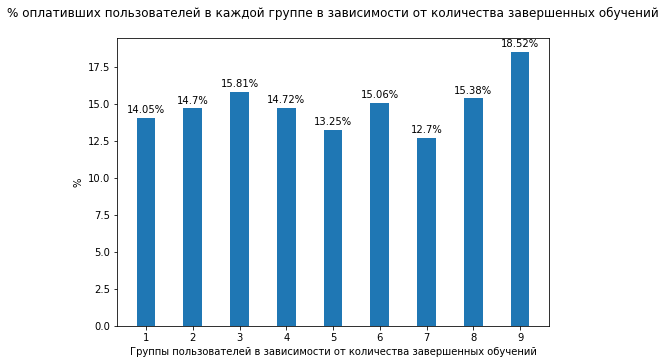

In [21]:
# созданием области построения и координатной плоскости 
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

# создание графика
rect = axes.bar(x = purchase_users_df_for_grafic.loc['% оплативших пользователей'].index, height = purchase_users_df_for_grafic.loc['% оплативших пользователей'], width = 0.4, tick_label = purchase_users_df_for_grafic.loc['% оплативших пользователей'].index)
# Настройка графика 
axes.set_title('% оплативших пользователей в каждой группе в зависимости от количества завершенных обучений\n')
axes.set_ylabel('%')
axes.set_xlabel('Группы пользователей в зависимости от количества завершенных обучений')
# проходимся по каждому столбику диаграммы и выводим над ним процент оплативших пользователей 
for r in rect:
    height = r.get_height()
    axes.annotate('{}%'.format(height),
            xy=(r.get_x() + r.get_width() / 2, height),
            xytext=(0, 3), 
            textcoords="offset points",
            ha='center', va='bottom')

display(purchase_users_df_for_grafic)



<a id="v4.2"></a>
### Вывод к разделу 4.2

Как видно по графику и таблице, между количеством успешно пройденных обучений и вероятностью оплаты зависимости не наблюдается. В каждой из 9 групп пользователей по количеству обучений разный процент оплативших пользователей (14.04%, 14.72%, 15.81%, 14.72%, 13.25%, 15.15%, 12.7%, 15.38%, 18.52%).
Cамый большой в последней группе, где пользователи проходили обучение 9 раз (18,52%), а самый маленький в группе, которая проходила обучение 7 раз (12.7%). 

Таким образом, на вероятность оплаты не влияет количество обучений. 

<a id="5"></a>
## 5. Частота начала этапа обучения после выбора уровня сложности

Посмотрим как часто пользователи начинают обучение после того, как они выбрали уровень сложности? Это позволит нам понять, насколько прозрачен процесс взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

Определим события, в которых дата начала обучения больше, чем дата выбора уровня сложности и после этого и найдем процент количества наступлений таких событий от всех событий начала обучений. 

Для начала:
- Построим таблицу с пользователями, когда-либо начинавших обучение. Этот набор данных необходим для определения группы пользователей, которые начинают обучение после выбора уровня сложности и для выявления процента таких случаев и пользователей;
- Построим таблицу с пользователями, которые начинали обучение после выбора уровня сложности 


In [22]:
# Датафрейм с пользователями и временем выбора уровня сложнсти 
level_choice_time_df = total_events_df[total_events_df['event_type']=='level_choice'][['user_id', 'start_time']].rename(columns = {'start_time':'level_choice_time'})

# Датафрейм с пользователями, которые когда-либо начинали обучение и временем начала их обучений 
tutorial_start_time_df = total_events_df[total_events_df['event_type']=='tutorial_start'][['user_id', 'start_time']].rename(columns = {'start_time':'tutorial_start_time'})

# Объединям таблицы 
merged_times_df = level_choice_time_df.merge(tutorial_start_time_df, on = 'user_id', how= 'inner')

# Оставляем только интересующие данные, где начало обучения идет после выбора уровня сложности вопросов 
merged_times_df = merged_times_df[merged_times_df['tutorial_start_time']>merged_times_df['level_choice_time']]

display(merged_times_df.head(10))




,user_id,level_choice_time,tutorial_start_time
1,47761,2018-01-01 15:05:04,2018-01-01 20:41:53
4,47768,2018-01-01 18:44:32,2018-01-01 20:04:42
16,47793,2018-01-02 21:02:30,2018-01-03 04:29:18
37,47824,2018-01-03 17:46:48,2018-01-03 19:30:20
52,47851,2018-01-04 04:03:32,2018-01-04 09:08:56
59,47859,2018-01-04 14:16:56,2018-01-04 15:16:36
60,47859,2018-01-04 14:16:56,2018-01-04 19:17:10
61,47859,2018-01-04 14:16:56,2018-01-04 21:02:53
62,47859,2018-01-04 14:16:56,2018-01-04 21:46:55
63,47859,2018-01-04 14:16:56,2018-01-04 22:28:10


Теперь определим частоту начала обучения после выбора уровня сложности:

In [23]:
# частота наступления события начала обучения после выбора уровня сложности 
event_frequency = len(merged_times_df)/len(tutorial_start_time_df)

# процент пользователей, когда-то начинавших обучение, которые начинали обучения после выбора уровня сложности 
user_frequency = len(merged_times_df['user_id'].unique()) / len(tutorial_start_time_df['user_id'].unique())

print('Пользователи начинают обучение после выбора уровня сложности в {} случаях из {} всех событий начала обучений, что составляет {:.2%}.\n'.format(len(merged_times_df), len(tutorial_start_time_df), event_frequency))
print('{} пользователей из {} когда либо начинавших обучение, наначинают его после выбора уровня сложности, что составляет {:.2%}.'.format(len(merged_times_df['user_id'].unique()), len(tutorial_start_time_df['user_id'].unique()), user_frequency))



Пользователи начинают обучение после выбора уровня сложности в 3632 случаях из 22597 всех событий начала обучений, что составляет 16.07%.

1769 пользователей из 14551 когда либо начинавших обучение, наначинают его после выбора уровня сложности, что составляет 12.16%.


Визуализация:

([<matplotlib.patches.Wedge at 0x7ff7d10a9310>,
 [Text(1.0207413428848156, 0.40998428131539794, ''),
  Text(-1.0207413140956891, -0.4099843529919233, '')],
 [Text(0.5567680052098993, 0.22362778980839884, '12.2%'),
  Text(-0.5567679895067394, -0.2236278289046854, '87.8%')])

<Figure size 432x288 with 0 Axes>

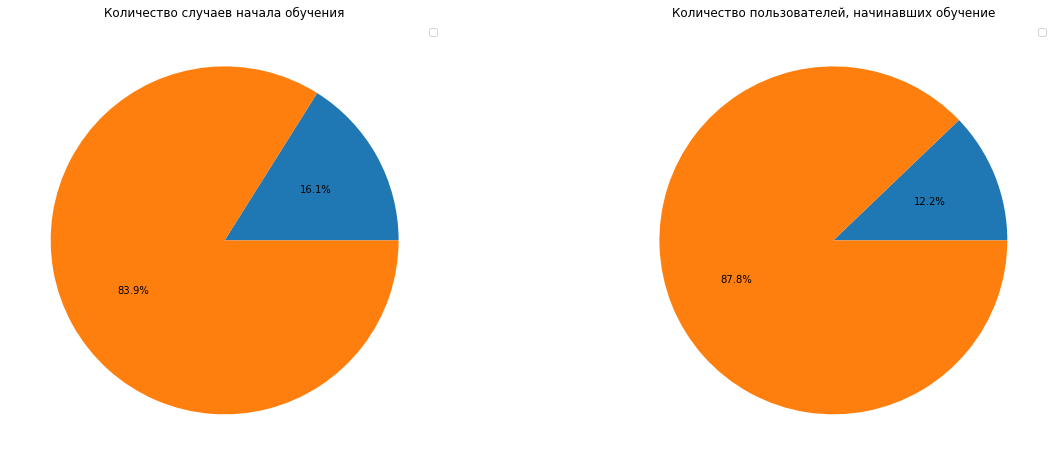

In [24]:
fig = plt.figure()
ax1 = plt.subplots(1, 2, figsize=(20,8))

labels = ['Начало обучения после выбора уровня сложности', 'Остальные случаи начала обучения']

ax1[1][0].set_title('Количество случаев начала обучения')
ax1[1][1].set_title('Количество пользователей, начинавших обучение')

ax1[1][0].legend(labels, loc = 1) 
ax1[1][1].legend(labels, loc = 1)

ax1[1][0].pie([len(merged_times_df), len(tutorial_start_time_df) - len(merged_times_df)], autopct='%1.1f%%')
ax1[1][1].pie([len(merged_times_df['user_id'].unique()), len(tutorial_start_time_df['user_id'].unique()) - len(merged_times_df['user_id'].unique())], autopct='%1.1f%%')




<a id="v5"></a>
### Вывок к разделу 5

Как видно на графиках, мы имеем 16.1% случаев(3 627 из 22 572) и 12.2% пользователей(1767 из 14536), которые начинали обучение после выбора уровня сложности, что свидетельствует о том, что для этой аудитории процесс взаимодействия с игрой не до конца понятен и прозрачен. 

12.2% пользователей довольно значимая часть всей аудитории, поэтому необходимо понять, что именно заставляет пользователей начинать обучение, что им непонятно, иначе в противном случае, мы потеряем этих пользователей и лишимся возможности получения потенциальной прибыли от них. Для этого нужно проводить интервью с пользователями.



<a id="6"></a>
# 6. Анализ выбора уровня сложности

<a id="6.1"></a>
## 6.1 Вероятность оплаты в зависиморсти от уровня сложности

До этого мы искали различные зависимости от прохождения обучения, а сейчас проверим, зависит ли вероятность оплаты от выбранного пользователем уровня сложности?
Если пользователи, например, с более высоким уровнем сложности реже оплачивают дополнительные вопросы, то стоило бы придумать, как можно было бы избежать этого, возможно, как-то мотивируя их выбирать менее сложные уровни. 

Для начала найдем группы пользователей в зависимости от выбранного уровня сложности: 

In [25]:
easy_level_users = total_events_df[total_events_df['selected_level'] == 'easy']['user_id'].unique() # группа с легким уровнем сложности
medium_level_users = total_events_df[total_events_df['selected_level'] == 'medium']['user_id'].unique() # группа со средним уровнем сложности
hard_level_users = total_events_df[total_events_df['selected_level'] == 'hard']['user_id'].unique() # группа с высоким уровнем сложности

print('Количество пользователей с уровнем сложности: \neasy: {}, \nmedium: {}, \nhard: {} '.format(len(easy_level_users),len(medium_level_users), len(hard_level_users)))
print()

# Проверка на то, что все правильно посчитано 
print('easy({}) + medium({}) + hard({}) = все пользователи с выбранным уровнем сложности({})'.format(len(easy_level_users), len(medium_level_users), len(hard_level_users), total_events_df[pd.notna(total_events_df['selected_level'])]['user_id'].nunique()))
print(total_events_df[pd.notna(total_events_df['selected_level'])]['user_id'].nunique() == (len(easy_level_users)+len(medium_level_users)+len(hard_level_users)))




Количество пользователей с уровнем сложности: 
easy: 2933, 
medium: 5776, 
hard: 1489 

easy(2933) + medium(5776) + hard(1489) = все пользователи с выбранным уровнем сложности(10198)
True


In [26]:
# Датафреймы, где пользователи оплатили дополнительные пакеты вопросов и которые выбрали определенный уровень сложности

easy_level_users_purchase_df = total_events_df[(total_events_df['event_type']=='purchase') & (total_events_df['user_id'].isin(easy_level_users))]
medium_level_users_purchase_df = total_events_df[(total_events_df['event_type']=='purchase') & (total_events_df['user_id'].isin(medium_level_users))]
hard_level_users_purchase_df = total_events_df[(total_events_df['event_type']=='purchase') & (total_events_df['user_id'].isin(hard_level_users))]


# Рассчитайте для каждой группы процент оплат (это мы тоже уже делали).

easy_level_users_persent = easy_level_users_purchase_df['user_id'].nunique() / len(easy_level_users)
medium_level_users_persent = medium_level_users_purchase_df['user_id'].nunique() / len(medium_level_users)
hard_level_users_persent = hard_level_users_purchase_df['user_id'].nunique() / len(hard_level_users)

print('Процент пользователей, которые оплатили дополнительные пакеты вопросов (от числа пользователей, выбравших легкий(easy) уровень сложности): {:.2%}'.format(easy_level_users_persent))
print()
print('Процент пользователей, которые оплатили дополнительные пакеты вопросов (от числа пользователей, выбравших средний(medium) уровень сложности): {:.2%}'.format(medium_level_users_persent))
print()
print('Процент пользователей, которые оплатили дополнительные пакеты вопросов (от числа пользователей, выбравших высокий(hard) уровень сложности): {:.2%}'.format(hard_level_users_persent))



Процент пользователей, которые оплатили дополнительные пакеты вопросов (от числа пользователей, выбравших легкий(easy) уровень сложности): 9.00%

Процент пользователей, которые оплатили дополнительные пакеты вопросов (от числа пользователей, выбравших средний(medium) уровень сложности): 20.17%

Процент пользователей, которые оплатили дополнительные пакеты вопросов (от числа пользователей, выбравших высокий(hard) уровень сложности): 36.60%


<a id="v6.1"></a>
### Вывод к разделу 6.1

Результат анализа показывает, что выбор уровня сложности влияет на покупку вопросов - чем выше выбранный пользователем уровень сложности - тем больше вероятность того, что пользователь купит дополнительный пакет. Скорее всего это связано с тем, что пользователи, выбирающие более сложный уровень проявляют больший азарт к игре и поэтому они чаще покупают дополнительные вопросы. 


<a id="6.2"></a>
## 6.2 Разница во времени оплат в зависимости от уровня сложности

Посмотрим, существует ли разница во времени оплаты между пользователями с разным уровнем сложности и их первой оплатой?

Как мы знаем, чем меньше срок до целевого действия в среднем, тем более управляемо приложение, и факторов, которые могут помешать пользователю совершить оплату тоже меньше. Поэтому если между уровнем сложности и количеством временем до оплаты есть зависимоть, то необходимо упринять меры, возможно, мотивируя пользователей выбирать соответствующий уровень сложности либо и вовсе изменить принцип уровней сложности. 






In [27]:
# Создаем датафреймы с событиями выбора уровня сложности для каждой группы


# В фильтре указываем, что выранный уровень сложности easy/medium/hard и получаем датафрейм только с 
# событиями выбора определенного уровня сложности (так как столбец selected_level имеет значение только в
# случае event_type = level_choice, можем сразу указать что selected_level = easy/medium/hard).
# Каждый пользователь в этом списке является уникальным, так как выше была проведена проверка на то 
# что уровень сложности можно выбрать только один раз (то есть возможность присутствия в этой таблице 
# нескольких одинаковых пользователей исключается)

easy_level_choice_events_df = total_events_df[total_events_df['selected_level']=='easy'][['selected_level', 'start_time', 'user_id']].rename(columns = {'start_time':'level_choice_time'})
medium_level_choice_events_df = total_events_df[total_events_df['selected_level']=='medium'][['selected_level', 'start_time', 'user_id']].rename(columns = {'start_time':'level_choice_time'})
hard_level_choice_events_df = total_events_df[total_events_df['selected_level']=='hard'][['selected_level', 'start_time', 'user_id']].rename(columns = {'start_time':'level_choice_time'})

display(easy_level_choice_events_df.head(10))
display(medium_level_choice_events_df.head(10))
display(hard_level_choice_events_df.head(10))



,selected_level,level_choice_time,user_id
18,easy,2018-01-01 16:54:36,47760
35,easy,2018-01-01 20:05:14,47759
48,easy,2018-01-02 00:07:39,47766
121,easy,2018-01-02 21:41:00,47797
152,easy,2018-01-03 04:54:57,47814
227,easy,2018-01-03 20:05:13,47833
257,easy,2018-01-04 00:46:46,47819
271,easy,2018-01-04 04:03:32,47851
273,easy,2018-01-04 04:10:59,47826
284,easy,2018-01-04 08:30:16,47830


,selected_level,level_choice_time,user_id
26,medium,2018-01-01 18:44:32,47768
58,medium,2018-01-02 04:48:02,47779
60,medium,2018-01-02 05:00:44,47780
64,medium,2018-01-02 06:18:45,47775
84,medium,2018-01-02 15:04:28,47786
85,medium,2018-01-02 15:25:35,47788
100,medium,2018-01-02 18:57:00,47790
112,medium,2018-01-02 20:54:33,47794
114,medium,2018-01-02 21:02:30,47793
117,medium,2018-01-02 21:22:42,47787


,selected_level,level_choice_time,user_id
13,hard,2018-01-01 15:05:04,47761
80,hard,2018-01-02 14:23:39,47771
119,hard,2018-01-02 21:35:02,47791
208,hard,2018-01-03 17:22:40,47815
248,hard,2018-01-04 00:04:46,47837
262,hard,2018-01-04 01:35:23,47836
325,hard,2018-01-04 15:25:23,47867
376,hard,2018-01-04 20:56:28,47874
434,hard,2018-01-05 07:45:13,47887
547,hard,2018-01-06 01:53:59,47921


In [28]:
# уберем лишние столбцы и переименуем поле event_datetime для удобства 
easy_level_users_purchase_df2 = easy_level_users_purchase_df[['user_id', 'start_time']].rename(columns = {'start_time':'purchase_time'})
medium_level_users_purchase_df2 = medium_level_users_purchase_df[['user_id', 'start_time']].rename(columns = {'start_time':'purchase_time'})
hard_level_users_purchase_df2 = hard_level_users_purchase_df[['user_id', 'start_time']].rename(columns = {'start_time':'purchase_time'})

print('easy level')
display(easy_level_users_purchase_df2.head(10))
print()
print('medium level')
display(medium_level_users_purchase_df2.head(10))
print()
print('hard level')
display(hard_level_users_purchase_df2.head(10))

easy level


,user_id,purchase_time
843,47797,2018-01-07 12:59:01
715,47814,2018-01-09 01:45:22
1389,48016,2018-01-09 12:09:05
1663,48005,2018-01-09 17:17:12
761,47894,2018-01-09 21:47:50
853,48164,2018-01-12 11:50:33
410,48280,2018-01-13 07:46:26
58,48351,2018-01-14 12:07:21
508,48048,2018-01-16 00:45:31
1687,48321,2018-01-16 02:14:56



medium level


,user_id,purchase_time
83,47828,2018-01-04 12:51:37
414,47827,2018-01-05 05:10:17
1649,47829,2018-01-05 12:50:29
293,47884,2018-01-06 00:27:10
1261,47922,2018-01-07 07:35:57
1570,47779,2018-01-07 12:48:08
693,47913,2018-01-07 15:37:38
180,47934,2018-01-07 21:43:45
285,47794,2018-01-08 01:51:07
1842,47824,2018-01-08 06:43:41



hard level


,user_id,purchase_time
1559,47771,2018-01-03 07:30:09
540,47791,2018-01-03 16:53:34
1183,47837,2018-01-04 07:29:31
14,47887,2018-01-06 21:07:09
924,47874,2018-01-07 06:24:33
1965,47921,2018-01-08 02:41:38
596,48146,2018-01-11 06:56:25
579,48163,2018-01-11 19:12:01
1945,48090,2018-01-14 00:26:16
651,48017,2018-01-14 08:49:16


In [29]:
# Объединим датафреймы в рамках одной группы и найдем разницу во времени между событиями 
easy_level_merged_df = easy_level_choice_events_df.merge(easy_level_users_purchase_df2, on='user_id', how='inner')
medium_level_merged_df = medium_level_choice_events_df.merge(medium_level_users_purchase_df2, on='user_id', how='inner')
hard_level_merged_df = hard_level_choice_events_df.merge(hard_level_users_purchase_df2, on='user_id', how='inner')

easy_level_merged_df['timedelta'] = easy_level_merged_df['purchase_time'] - easy_level_merged_df['level_choice_time']
medium_level_merged_df['timedelta'] = medium_level_merged_df['purchase_time'] - medium_level_merged_df['level_choice_time']
hard_level_merged_df['timedelta'] = hard_level_merged_df['purchase_time'] - hard_level_merged_df['level_choice_time']

display(easy_level_merged_df.head(10))
display(medium_level_merged_df.head(10))
display(hard_level_merged_df.head(10))

,selected_level,level_choice_time,user_id,purchase_time,timedelta
0,easy,2018-01-02 21:41:00,47797,2018-01-07 12:59:01,4 days 15:18:01
1,easy,2018-01-03 04:54:57,47814,2018-01-09 01:45:22,5 days 20:50:25
2,easy,2018-01-05 12:28:08,47894,2018-01-09 21:47:50,4 days 09:19:42
3,easy,2018-01-08 07:02:49,48005,2018-01-09 17:17:12,1 days 10:14:23
4,easy,2018-01-08 15:31:31,48016,2018-01-09 12:09:05,0 days 20:37:34
5,easy,2018-01-09 05:05:15,48048,2018-01-16 00:45:31,6 days 19:40:16
6,easy,2018-01-10 18:57:22,48164,2018-01-12 11:50:33,1 days 16:53:11
7,easy,2018-01-12 15:48:48,48280,2018-01-13 07:46:26,0 days 15:57:38
8,easy,2018-01-13 03:17:23,48321,2018-01-16 02:14:56,2 days 22:57:33
9,easy,2018-01-13 21:06:19,48351,2018-01-14 12:07:21,0 days 15:01:02


,selected_level,level_choice_time,user_id,purchase_time,timedelta
0,medium,2018-01-02 04:48:02,47779,2018-01-07 12:48:08,5 days 08:00:06
1,medium,2018-01-02 18:57:00,47790,2018-01-11 05:26:53,8 days 10:29:53
2,medium,2018-01-02 20:54:33,47794,2018-01-08 01:51:07,5 days 04:56:34
3,medium,2018-01-03 17:46:48,47824,2018-01-08 06:43:41,4 days 12:56:53
4,medium,2018-01-03 18:26:36,47828,2018-01-04 12:51:37,0 days 18:25:01
5,medium,2018-01-03 20:02:07,47827,2018-01-05 05:10:17,1 days 09:08:10
6,medium,2018-01-03 23:15:21,47829,2018-01-05 12:50:29,1 days 13:35:08
7,medium,2018-01-04 15:20:00,47862,2018-01-11 00:59:50,6 days 09:39:50
8,medium,2018-01-05 04:39:16,47884,2018-01-06 00:27:10,0 days 19:47:54
9,medium,2018-01-05 17:58:19,47882,2018-01-08 11:48:47,2 days 17:50:28


,selected_level,level_choice_time,user_id,purchase_time,timedelta
0,hard,2018-01-02 14:23:39,47771,2018-01-03 07:30:09,0 days 17:06:30
1,hard,2018-01-02 21:35:02,47791,2018-01-03 16:53:34,0 days 19:18:32
2,hard,2018-01-04 00:04:46,47837,2018-01-04 07:29:31,0 days 07:24:45
3,hard,2018-01-04 20:56:28,47874,2018-01-07 06:24:33,2 days 09:28:05
4,hard,2018-01-05 07:45:13,47887,2018-01-06 21:07:09,1 days 13:21:56
5,hard,2018-01-06 01:53:59,47921,2018-01-08 02:41:38,2 days 00:47:39
6,hard,2018-01-08 20:17:00,48017,2018-01-14 08:49:16,5 days 12:32:16
7,hard,2018-01-10 05:40:17,48090,2018-01-14 00:26:16,3 days 18:45:59
8,hard,2018-01-10 17:44:07,48146,2018-01-11 06:56:25,0 days 13:12:18
9,hard,2018-01-10 21:41:36,48163,2018-01-11 19:12:01,0 days 21:30:25


In [30]:

print('Медианное время между событиями выбора уровня сложности и покупкой для группы пользователей выбравших легкий уроовень сложности:', easy_level_merged_df['timedelta'].median())
print()
print('Медианное время между событиями выбора уровня сложности и покупкой для группы пользователей выбравших средний уроовень сложности:', medium_level_merged_df['timedelta'].median())
print()
print('Медианное время между событиями выбора уровня сложности и покупкой для группы пользователей выбравших высокий уроовень сложности:', hard_level_merged_df['timedelta'].median())



Медианное время между событиями выбора уровня сложности и покупкой для группы пользователей выбравших легкий уроовень сложности: 3 days 09:31:29

Медианное время между событиями выбора уровня сложности и покупкой для группы пользователей выбравших средний уроовень сложности: 3 days 14:55:07

Медианное время между событиями выбора уровня сложности и покупкой для группы пользователей выбравших высокий уроовень сложности: 3 days 09:34:38


In [31]:
easy_level_mean_time = easy_level_merged_df['timedelta'].median()
medium_level_mean_time = medium_level_merged_df['timedelta'].median()
hard_level_mean_time = hard_level_merged_df['timedelta'].median()


title='Продолжительность времени до наступления события оплаты после выбора уровня сложности'
time = 'Часы'   
x_data = ['Легкий уровень', 'Средний уровень', 'Сложный уровень']  
y_data = [easy_level_merged_df['timedelta'].apply( lambda x: (x.seconds/60 + x.days*24*60)/60), medium_level_merged_df['timedelta'].apply( lambda x: (x.seconds/60 + x.days*24*60)/60), hard_level_merged_df['timedelta'].apply( lambda x: (x.seconds/60 + x.days*24*60)/60)]
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(127, 96, 9, 0.5)']
    
fig = go.Figure()
for xd, yd, cls in zip(x_data, y_data, colors):
    fig.add_trace(go.Box(
        y=yd,
        name=xd,
        boxpoints='all',
        jitter=0.2,
        whiskerwidth=0.2,
        fillcolor=cls,
        marker_size=2,
        line_width=1))
    fig.update_layout(
        title=title,
        yaxis=dict(
            title=time,
            autorange=True,
            showgrid=True,
            zeroline=True,
            dtick=1,
            gridcolor='rgb(255,255,255)',
            gridwidth=1,
            zerolinecolor='rgb(255,255,255)',
            zerolinewidth=2,),
        margin=dict(
            l=40,
            r=30,
            b=80,
            t=100,),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
        showlegend=False)
fig.show() 





<a id="v6.2"></a>
### Вывод к разделу 6.2 

- Медиана для легкого уровня =  3 дня 09:31:29
- Медиана для среднего уровня = 3 дня 14:55:07
- Медиана для сложного уровня = 3 дня 09:34:38

График показывает, что больше всего пользователей выбирает средний уровень сложности. Медианное время до наступленния события оплаты у пользователей, выбравших среднюю сложность является самым высоким (3 дня 14 часов 55 минут).

У сложного уровня пользователей уже меньше, но зато меньше всего медиана (3 дня 9 часов 34 минуты), как и у легкого уровня (3 дня 9 часов 31 минута). 

Таким образом дельта во времени у всех этапов разная. Возможно, есть зависимость в том, что те, кто выбирает сложный уровень больше вовлечены в процесс, они более азартны и проходят игру быстрее других. Те, кто выбирает легкий уровень проходят игру быстрее потому что на легкие вопросы отвечать быстрее. А пользователи, выбирающие средний уровень сложности не так увлечены, как пользователи со сложным уровнем, но вопросы там уже сложнее, чем в легком и нужно больше времени, чтобы на них ответить. Это, конечно, гипотеза, чтобы ее подтвердить, можно увеличить выборку пользователей и снова сравнить результаты, а также провести интервью. 



